# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\visma\AppData\Local\Temp\ipykernel_13124\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [6]:
#Q1
df.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [7]:
# Q2 컬럼별 결측치 확인하기 
df.isnull().sum()

id                                      0
host_response_time                  19006
host_response_rate                  19006
host_acceptance_rate                14015
host_is_superhost                       5
host_listings_count                     5
host_total_listings_count               5
host_verifications                      0
host_has_profile_pic                    5
host_identity_verified                  5
neighborhood                            0
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                              54
bedrooms                               77
beds                                  482
bed_type                                0
amenities                               0
square_feet                         50407
price                             

In [23]:
# 결측치가 0이 아닌 컬럼만 뽑아 결측치가 많은 순으로 정렬 
column = [] ; nullv = [] ; ratio = []
for name in df.columns:
    if df.isnull().sum()[name] >0 :
        column.append(name)
        nullv.append(df.isnull().sum()[name])
        ratio.append((df.isnull().sum()[name] / len(df[name]) *100).round(2))

new_ratio = pd.DataFrame({'column': column, 'null_num' : nullv, 'missing_%' : ratio})
df_sorted = new_ratio.sort_values(by='null_num', ascending = False)

df_sorted = df_sorted.reset_index(drop = True)

df_sorted

,column,null_num,missing_%
0,jurisdiction_names,50781,99.97
1,license,50759,99.93
2,square_feet,50407,99.23
3,monthly_price,46119,90.79
4,weekly_price,45411,89.40
5,host_response_rate,19006,37.42
6,host_response_time,19006,37.42
7,security_deposit,17325,34.11
8,host_acceptance_rate,14015,27.59
9,review_scores_value,11482,22.60


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

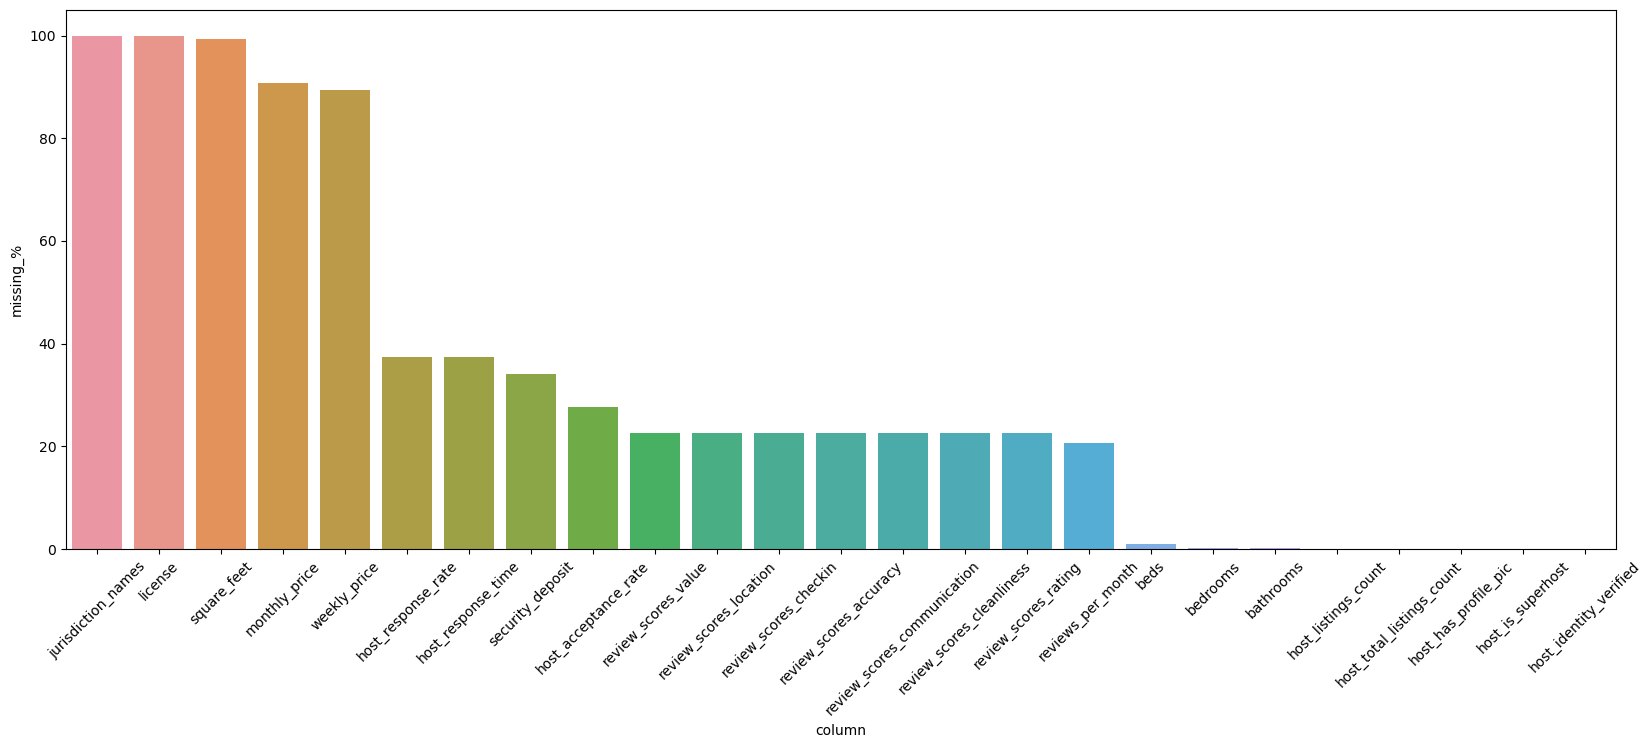

In [32]:
plt.figure(figsize = (20,7))
sns.barplot(x = 'column', y = 'missing_%', data = df_sorted)

plt.xticks(rotation = 45)
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [36]:
df[df['beds'].isna()].head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [37]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [38]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<Axes: xlabel='room_type', ylabel='count'>

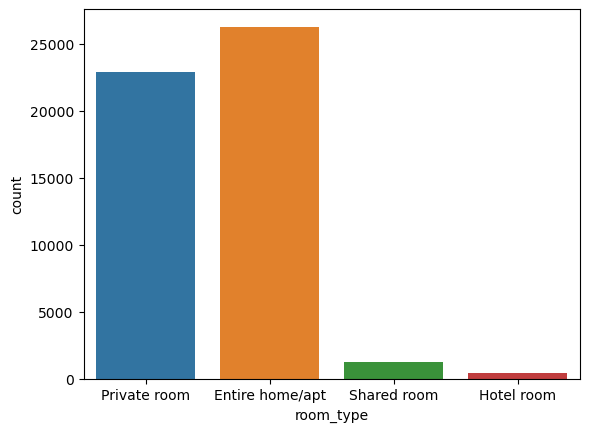

In [40]:
# Q5
sns.countplot(x='room_type', data = df)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

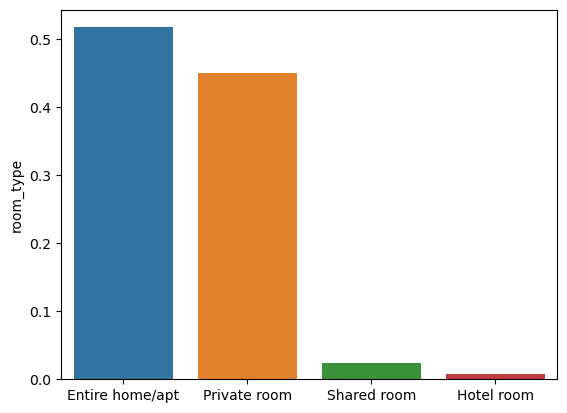

In [59]:
room_ratio = pd.DataFrame(df['room_type'].value_counts() / len(df['room_type']))
room_ratio = room_ratio.reset_index()

fig = sns.barplot(x = 'index', y = 'room_type', data = room_ratio)
fig.set(xlabel = None)
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

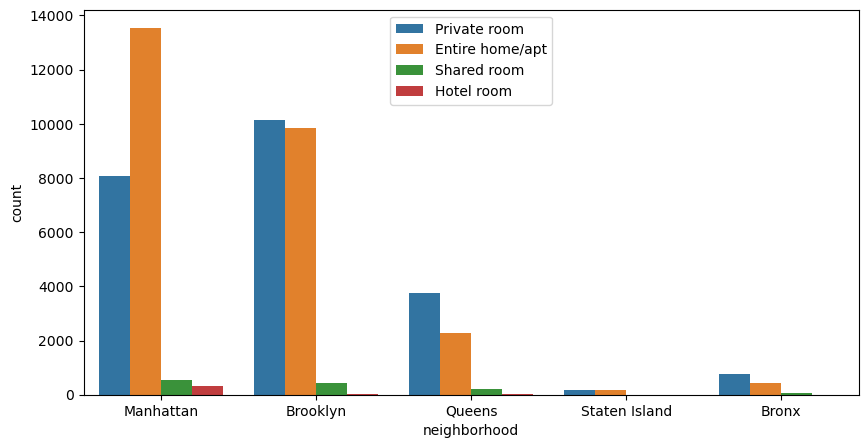

In [46]:
plt.figure(figsize = (10,5))
sns.countplot(x='neighborhood', hue = 'room_type', data = df)
plt.legend(loc='upper center')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<Axes: xlabel='neighborhood', ylabel='price'>

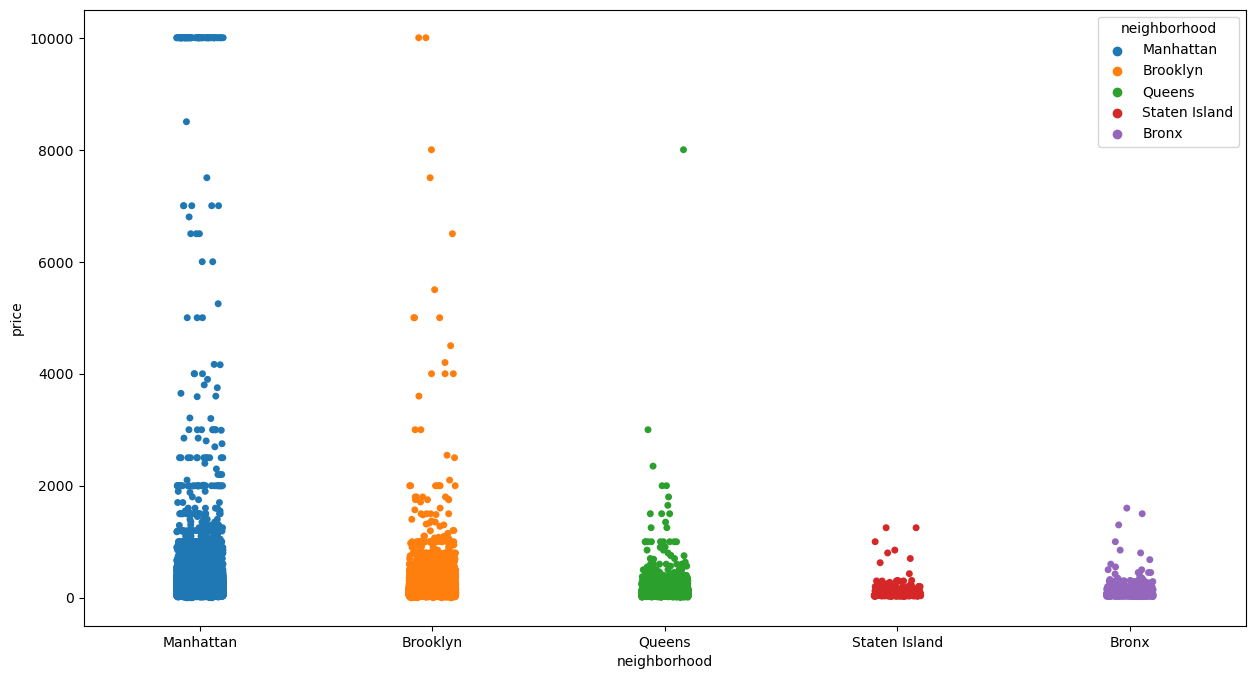

In [64]:
plt.figure(figsize = (15, 8))
sns.stripplot(x='neighborhood', y = 'price',hue = 'neighborhood', data = df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

- Q8의 그래프를 통해 Manhatan과 Brooklyn에 가격대가 높은 방들이 존재함을 알 수 있음
- Q6을 통해 Private Room, Entire Home/APT 유형의 숙소들이 주로 운영되고 있음을 알 수 있으며, Q7을 통해 Manhattan의 경우 Private Room보다 Entire Home/APT가 많이 운영되고 있음을 파악할 수 있음. Manhattan 지역의 숙소 가격대가 높았음을 고려할 때, Private room 보다 숙소 전체를 빌려주는 경우가 많기 때문이지 않을까 추론해볼 수 있음

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

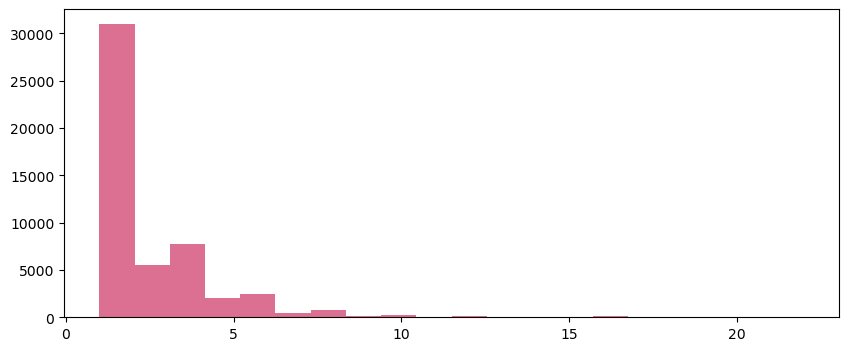

In [83]:
plt.figure(figsize=(10,4))
plt.hist(x='accommodates',data = df,bins = 20, color = 'palevioletred' )
plt.show()

#seaborn의 histplot으로도 시각화 가능 
#sns.histplot(x='accommodates',data=df, bins=20,color = 'palevioletred')

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

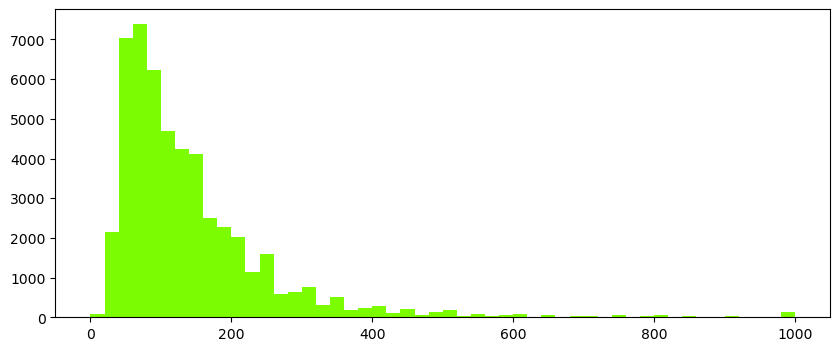

In [102]:
plt.figure(figsize=(10,4))
plt.hist(x='price',data = df, color = 'lawngreen', range = (0,1000), bins = 50)
plt.show()

---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [283]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

C:\Users\visma\AppData\Local\Temp\ipykernel_13124\577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [284]:
#처리 전
df.shape

(50796, 54)

In [285]:
#Q12
new = df.copy()

# 결측치 25% 이상인 column drop
new.drop(columns = df.columns[df.isna().sum()/len(df) >= 0.25], axis = 1, inplace=True)

# 결측치 10% 이상 25% 미만인 경우 결측치 있는 행을 drop
cols = df.columns[(0.1 <= df.isna().sum()/len(df)) & (df.isna().sum()/len(df) < 0.25)]
new.dropna(subset = cols, axis=0, inplace=True)

# 결측치가 10% 미만인 경우 중앙값으로 대체 
cols = df.columns[df.isna().sum()/len(df) < 0.1]
new[cols] = new[cols].fillna(df.median(numeric_only = True))

In [286]:
#처리 후 
new.shape

(39291, 45)

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


#### FE 전 전처리<br><br/>

1) Price 컬럼에 대한 이상치 탐지 

- Q11 EDA 과정에서 금액대가 1000 이하에 몰려 있는 것을 확인함. 왜도와 첨도를 계산해보니, 둘 다 결과값이 크게 나와 이상치가 많다고 판단함. 이상치를 제외하기 위해 전체 분포의 1 ~ 99%에 해당하는 값만 사용하기로 결정.  

In [244]:
#왜도, 첨도 계산 
skew = new['price'].skew(); kurt = new['price'].kurt()
print(f'skewness : {skew}')
print(f'kurtosis : {kurt}')

skewness : 22.704481034095142
kurtosis : 599.3666952447193


<Axes: ylabel='price'>

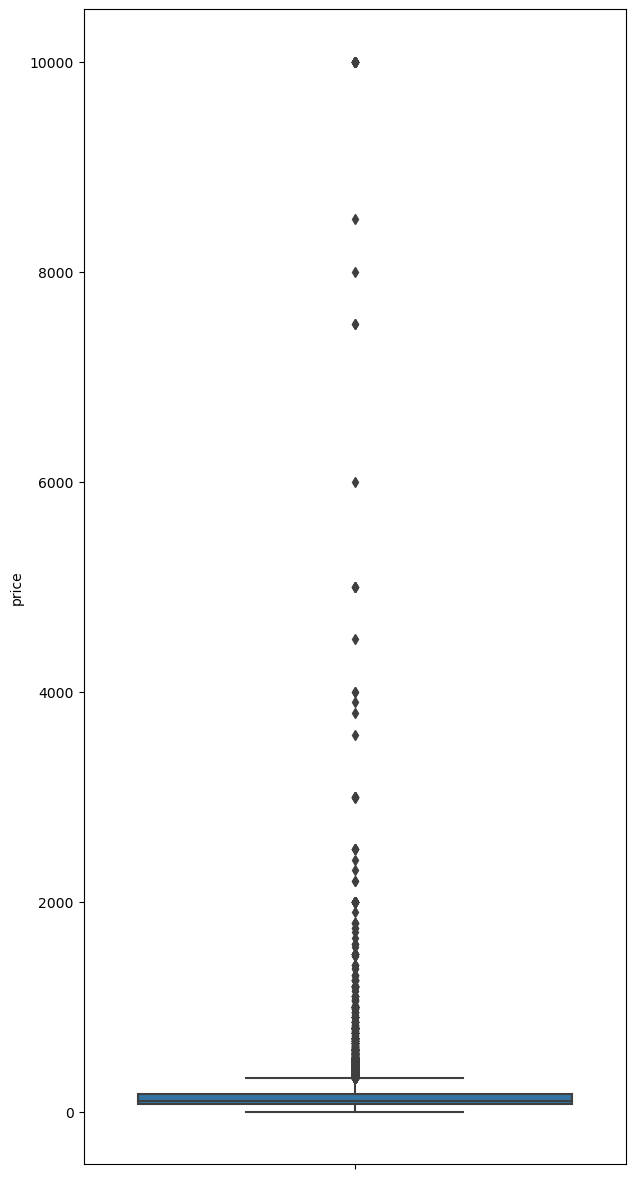

In [181]:
#boxplot으로 분포 확인해보기
plt.figure(figsize=(7,15))
sns.boxplot(y='price', data = new)

In [287]:
# 전체 데이터의 1~99% 상/하한 정하고 이상치 없애기 
min_th, max_th = new['price'].quantile([0.01,0.99])
new = new[(new['price'] >= min_th) & (new['price'] <= max_th)]

In [204]:
# 이상치 처리 후의 왜도, 첨도 
skew = new['price'].skew(); kurt = new['price'].kurt()
print(f'skewness : {skew}')
print(f'kurtosis : {kurt}')

skewness : 2.2268463558769587
kurtosis : 7.180764999202372


<Axes: ylabel='price'>

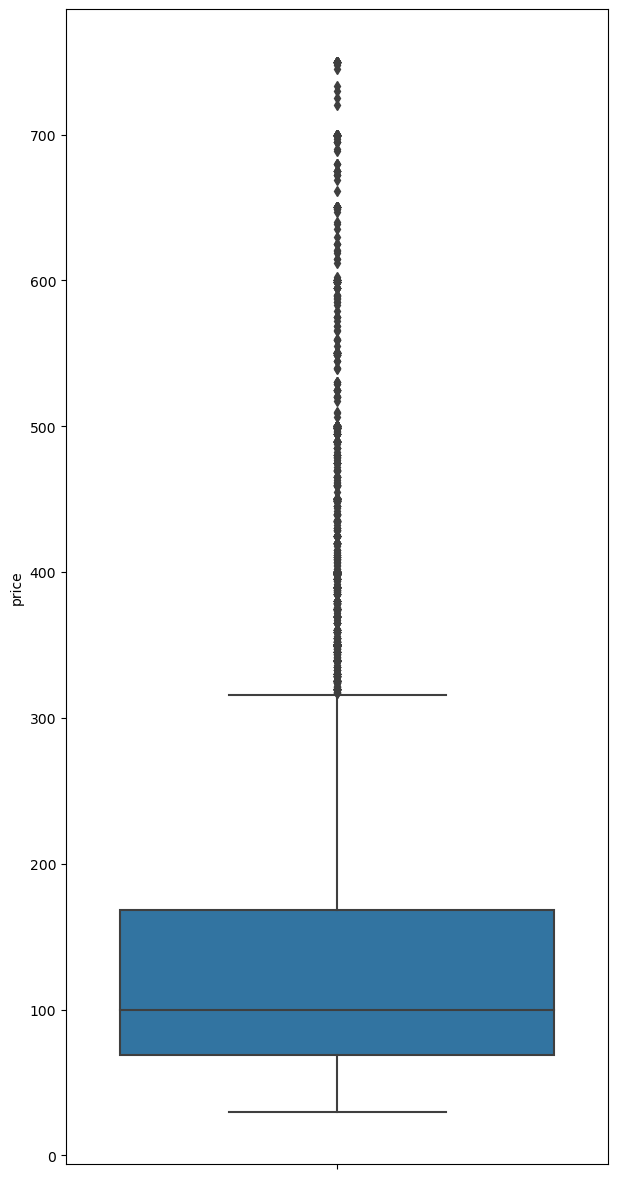

In [203]:
#boxplot으로 분포 확인해보기
plt.figure(figsize=(7,15))
sns.boxplot(y='price', data = new)

In [288]:
new.shape

(38577, 45)

### FE

#### 1. Feature Split 

- 원본 데이터에서는 'amenities' 컬럼에 숙소가 제공하는 amenities가 단순히 나열되어 있음.
- amenities를 "몇 개" 제공하는지보다 "어떤 것을" 제공하는지가 중요할 것이라고 판단하고, 'amenities' 컬럼의 속성을 분리하고자 함
- amenities 컬럼에 대한 몇 가지 처리를 진행해 amenities의 등장 횟수를 dictionary 형태로 출력했고, 총 38577개의 데이터 중 약 70% 이상이 제공하는 어매니티 품목과 30% 미만의 숙소가 제공하는 amenity 품목을 제외한 나머지를 새로운 컬럼으로 생성함.
- 새롭게 생성된 컬럼에 대해서는 해당 품목을 제공하는지 아닌지의 여부를 이진 범주화해서 나타냄 (0 : 제공 안함 / 1 : 제공함) 

In [289]:
#Q13-1) 

encoded = new.copy()
#리스트 형태로 컬럼값 변경
encoded['amenities'] = encoded['amenities'].apply(lambda x : x[1:-1].split(','))

# 컬럼값 하나의 리스트로 합치기 
ams = []
for idx in encoded['amenities']:
    for con in idx:
        ams.append(con)

# amenity 명 : 등장 횟수로 딕녀서리 생성하기 
am_dict = {}
for am in set(ams):
    am_dict[am] = ams.count(am)

In [263]:
# 등장 횟수 기반으로 내립차순 정렬 
sorted(am_dict.items(), key = lambda x : x[1], reverse = True)

[('Wifi', 37925),
 ('Heating', 36829),
 ('Essentials', 36483),
 ('Kitchen', 35220),
 ('"Smoke detector"', 34365),
 ('"Air conditioning"', 33598),
 ('Hangers', 30129),
 ('"Carbon monoxide detector"', 28328),
 ('Shampoo', 27532),
 ('"Hair dryer"', 27257),
 ('TV', 26564),
 ('Iron', 25831),
 ('"Laptop friendly workspace"', 25647),
 ('"Hot water"', 24822),
 ('Refrigerator', 20414),
 ('"Dishes and silverware"', 20195),
 ('"Cooking basics"', 17355),
 ('"Free street parking"', 17245),
 ('Microwave', 17144),
 ('Stove', 17119),
 ('Oven', 16506),
 ('"Coffee maker"', 15953),
 ('"Fire extinguisher"', 15825),
 ('"Lock on bedroom door"', 15249),
 ('Washer', 15006),
 ('Dryer', 14768),
 ('"Bed linens"', 14509),
 ('"First aid kit"', 14130),
 ('Internet', 10902),
 ('"Extra pillows and blankets"', 10364),
 ('"Family/kid friendly"', 9980),
 ('"Self check-in"', 9896),
 ('Elevator', 9435),
 ('"Cable TV"', 9213),
 ('"Long term stays allowed"', 8781),
 ('"Private entrance"', 8552),
 ('"Buzzer/wireless intercom

결과적으로 선정된 컬럼은 다음과 같음:

Shampoo, "Hair dryer", TV, Iron, "Laptop friendly workspace", "Hot water", Refrigerator, "Dishes and silverware", "Cooking basics","Free street parking",Microwave,Stove,Oven,"Coffee maker","Fire extinguisher", "Lock on bedroom door",Washer,Dryer,"Bed linens","First aid kit"

선정된 어매니티 품목을 컬럼으로 바꾼 뒤 숙소에서 해당 품목을 제공하고 있다면 1, 아니라면 0으로 채우기

In [290]:
new_cols = ['Shampoo', '"Hair dryer"', 'TV', 'Iron', '"Laptop friendly workspace"', '"Hot water"', 'Refrigerator', '"Dishes and silverware"', '"Cooking basics"','"Free street parking"','Microwave','Stove','Oven','"Coffee maker"','"Fire extinguisher"', '"Lock on bedroom door"','Washer','Dryer','"Bed linens"','"First aid kit"']
new_data = {}

for i in new_cols:
    new_data[i] = []

In [291]:
for product in new_cols:
    for am in encoded['amenities']:
        if product in am :
            new_data[product].append(1)
        else:
            new_data[product].append(0)

In [292]:
new_df = pd.DataFrame(new_data)

In [302]:
final = pd.concat([encoded.reset_index(drop='True'), new_df], axis=1)
final.drop('amenities',axis=1,inplace=True)
final

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,Microwave,Stove,Oven,"""Coffee maker""","""Fire extinguisher""","""Lock on bedroom door""",Washer,Dryer,"""Bed linens""","""First aid kit"""
0,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,...,0,1,1,1,1,1,0,0,1,0
1,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,...,1,1,1,1,1,1,0,0,0,0
2,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,...,1,1,1,1,1,0,0,0,1,1
3,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,...,0,0,0,0,0,0,1,1,0,0
4,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,40.68688,-73.95596,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38572,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,...,1,0,0,0,1,1,0,0,1,0
38573,42762152,f,1.0,1.0,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,...,0,0,0,0,1,1,0,0,0,1
38574,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,...,0,0,0,0,1,1,0,0,0,1
38575,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,...,1,1,1,1,0,1,0,0,1,0


#### 2. 지표변수 생성

- 숙소 수용 인원을 나타내는 accommodates도 가격 책정의 중요 요소가 될 것이라고 판단하고, feature 생성을 위해 histplot으로 시각화함
- histplot으로 분포를 확인해봤을 때,1 ~ 3명은 small, 4 ~ 6명은 medium, 7~ 명은 large로 구분하기로 결정
- group_size 컬럼을 새로 생성함

<Axes: xlabel='accommodates', ylabel='Count'>

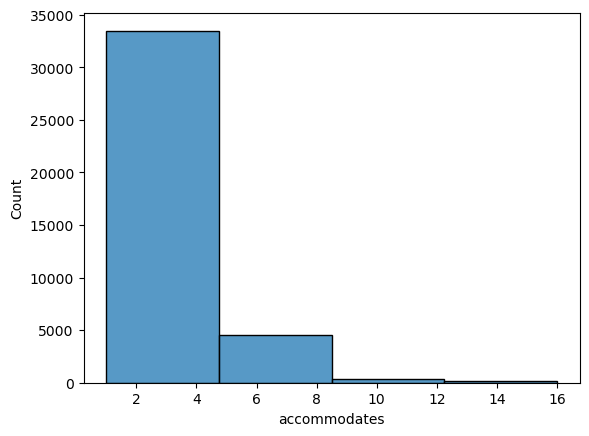

In [319]:
#Q13-2) 지표변수 생성 

#accommodates 컬럼의 분포 확인
sns.histplot(x='accommodates', data = final, bins = 4)

In [322]:
size = []
for val in final['accommodates']:
    if (1 <= val < 4):
        size.append('small')
    elif (4 <= val < 7):
        size.append('medium')
    else:
        size.append('large')

final['group_size'] = size

In [326]:
final[['accommodates','group_size']]

,accommodates,group_size
0,2,small
1,3,small
2,2,small
3,2,small
4,2,small
...,...,...
38572,2,small
38573,2,small
38574,2,small
38575,3,small


### Feature Selection 전 전처리 2

#### 1. Domain 지식 기반으로 불필요한 컬럼 걸러내기
- 이상치 제거, feature split 및 지표변수 생성까지 완료한 final df에서 불필요한 컬럼을 제거하고자 함
- 가격 책정에 영향을 미치지 않을 것 같은 id, host_verifications,reviews_per_month를 제거하고, 유사한 내용을 반복하는 컬럼인 host_listings_count도 제거
- 특히나 이진 값으로 표현된 컬럼 중, 데이터 분포가 과도하게 한쪽으로 쏠려 있는 'host_has_profile_pic'이나 'is_location_exact', 'requires_license','require_guest_profile_picture','require_guest_phone_verification' 컬럼을 없애기로 결정

In [363]:
prepared = final.drop(columns=['id','host_verifications',
                              'reviews_per_month', 'host_listings_count',
                              'host_has_profile_pic','is_location_exact',
                              'requires_license','require_guest_profile_picture',
                              'require_guest_phone_verification'])

<Axes: xlabel='host_has_profile_pic', ylabel='count'>

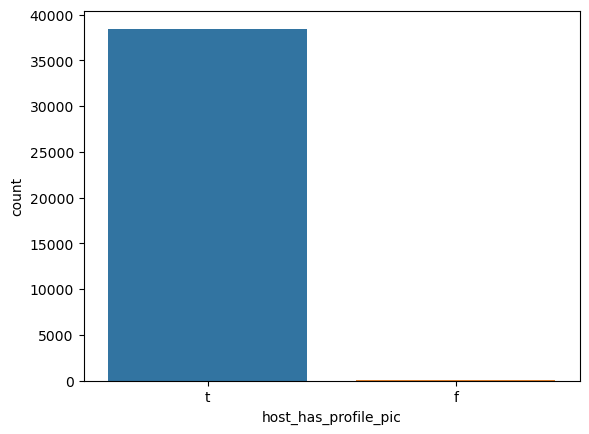

In [332]:
sns.countplot(x='host_has_profile_pic', data = final)

<Axes: xlabel='is_location_exact', ylabel='count'>

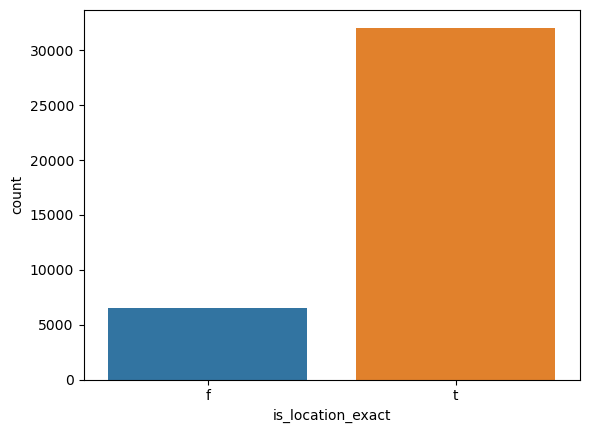

In [333]:
sns.countplot(x='is_location_exact', data = final)

<Axes: xlabel='requires_license', ylabel='count'>

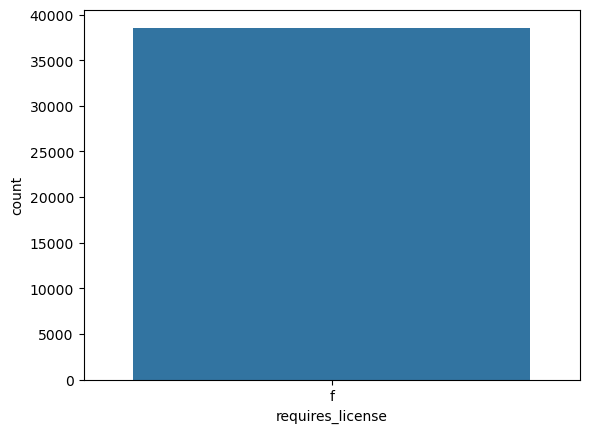

In [335]:
sns.countplot(x='requires_license', data = final)

<Axes: xlabel='require_guest_profile_picture', ylabel='count'>

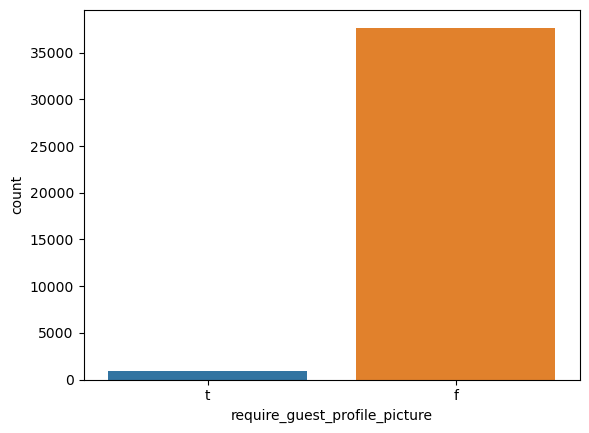

In [336]:
sns.countplot(x='require_guest_profile_picture', data = final)

<Axes: xlabel='require_guest_phone_verification', ylabel='count'>

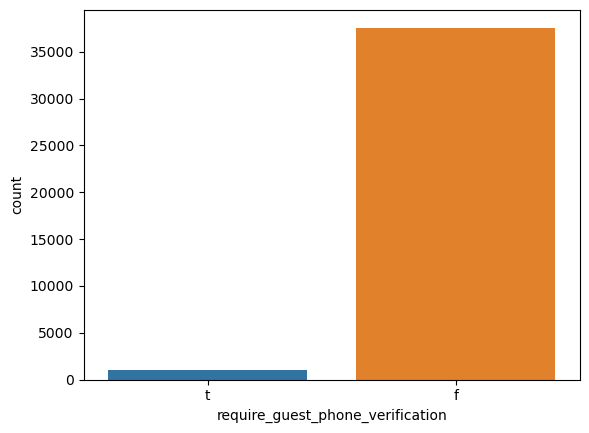

In [337]:
sns.countplot(x='require_guest_phone_verification', data = final)

#### 2. 수치형 변수 스케일링

In [364]:
y = prepared['price']
x = prepared.drop(['price'],axis=1)

In [366]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mm_scaler = MinMaxScaler()
sd_scaler = StandardScaler()

In [383]:
# Standard Scaling
prepared._get_numeric_data().iloc[:,:-20].columns.tolist()
sd_scaler = sd_scaler.fit_transform(scale)


In [387]:
cols = prepared._get_numeric_data().iloc[:,:-20].columns.tolist()

x[cols] = sd_scaler

In [388]:
x

,host_is_superhost,host_total_listings_count,host_identity_verified,neighborhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,Oven,"""Coffee maker""","""Fire extinguisher""","""Lock on bedroom door""",Washer,Dryer,"""Bed linens""","""First aid kit""",group_size,price
0,f,-0.045389,t,Manhattan,0.456535,-0.708578,Apartment,Entire home/apt,-0.490642,-0.343084,...,1,1,1,1,0,0,1,0,small,0.964637
1,f,-0.106295,t,Brooklyn,-0.778954,-0.210129,Guest suite,Entire home/apt,0.055134,-0.343084,...,1,1,1,1,0,0,0,0,small,-0.460973
2,f,-0.106295,f,Manhattan,0.349187,-0.526512,Apartment,Entire home/apt,-0.490642,-0.343084,...,1,1,1,0,0,0,1,1,small,0.702576
3,f,-0.081933,f,Manhattan,-0.166261,-0.846217,Apartment,Private room,-0.490642,-0.343084,...,0,0,0,0,1,1,0,0,small,-0.408560
4,f,-0.106295,f,Brooklyn,-0.747562,-0.131241,Apartment,Private room,-0.490642,-0.343084,...,0,0,0,0,0,0,0,0,small,-0.764963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38572,f,-0.118476,f,Queens,0.215138,2.671988,Villa,Private room,-0.490642,-0.343084,...,0,0,1,1,0,0,1,0,small,-0.985094
38573,f,-0.106295,f,Brooklyn,-0.755320,0.240987,Apartment,Private room,-0.490642,-0.343084,...,0,0,1,1,0,0,0,1,small,-0.555314
38574,f,-0.118476,f,Manhattan,1.872801,0.162721,Apartment,Private room,-0.490642,-0.343084,...,0,0,1,1,0,0,0,1,small,-0.817375
38575,f,0.003336,f,Manhattan,0.601590,-0.861372,Condominium,Entire home/apt,0.055134,0.974633,...,1,1,0,1,0,0,1,0,small,0.492928


#### 3. 범주형 변수 인코딩 

- prepared 데이터프레임의 값들 중 범주형 변수를 담고 있는 컬럼 (문자열로 표현된)을 get_dummies를 활용해 인코딩


In [389]:
fin = pd.get_dummies(x)

In [390]:
fin

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,...,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,group_size_large,group_size_medium,group_size_small
0,-0.045389,0.456535,-0.708578,-0.490642,-0.343084,-1.613513,-0.501341,-0.493463,0.050979,-0.005136,...,1,0,0,0,1,0,0,0,0,1
1,-0.106295,-0.778954,-0.210129,0.055134,-0.343084,-0.240038,2.203460,-0.493463,-0.274278,-0.005172,...,1,0,1,0,0,0,0,0,0,1
2,-0.106295,0.349187,-0.526512,-0.490642,-0.343084,-0.240038,-0.501341,0.345437,-0.165859,-0.005237,...,1,0,1,0,0,0,0,0,0,1
3,-0.081933,-0.166261,-0.846217,-0.490642,-0.343084,-0.240038,-0.501341,-0.493463,-0.274278,-0.005172,...,1,0,0,0,1,0,0,0,0,1
4,-0.106295,-0.747562,-0.131241,-0.490642,-0.343084,-0.240038,-0.501341,-0.493463,1.243587,-0.005172,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38572,-0.118476,0.215138,2.671988,-0.490642,-0.343084,-0.240038,-0.501341,-0.493463,-0.274278,-0.005136,...,1,0,1,0,0,0,0,0,0,1
38573,-0.106295,-0.755320,0.240987,-0.490642,-0.343084,-0.240038,-0.501341,-0.493463,-0.220069,-0.005237,...,1,1,0,0,0,0,0,0,0,1
38574,-0.118476,1.872801,0.162721,-0.490642,-0.343084,-0.240038,-0.501341,0.345437,-0.274278,-0.005136,...,1,0,0,0,1,0,0,0,0,1
38575,0.003336,0.601590,-0.861372,0.055134,0.974633,1.133436,0.400259,-0.493463,0.809912,-0.005136,...,1,0,0,0,1,0,0,0,0,1


### Feature Selection (FE 3단계)

- 변수 추가 및 인코딩으로 인해 column 수가 과도하게 증가한 상태임
- feature selection을 통해 가격에 영향을 미치는 요소 골라내기

In [393]:
#Q13-3) Feature Selection
import pymrmr
selected_features = pymrmr.mRMR(fin, 'MIQ', 10)  # 10개의 특성 선택

print("Selected Features via mRMR: ", selected_features)

Selected Features via mRMR:  ['minimum_nights', 'extra_people_$5.00', 'property_type_Apartment', 'Stove', 'neighborhood_Brooklyn', 'cancellation_policy_strict', 'Dryer', 'instant_bookable_t', 'cancellation_policy_super_strict_60', 'cancellation_policy_moderate']


In [392]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(fin)

principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

principalDf

,PC1,PC2,PC3,PC4,PC5
0,0.463058,0.065552,-1.255604,-0.782085,2.006116
1,1.724540,-0.802305,-0.434153,4.830992,1.895177
2,-1.054921,-0.367450,0.612724,1.266710,1.937957
3,0.152124,-0.393630,-1.978117,-2.217391,-0.382938
4,1.587059,2.105932,-2.214669,-1.901855,-1.418499
...,...,...,...,...,...
38572,0.480648,-0.838220,-2.819532,-0.841581,-2.487684
38573,0.456959,-0.498881,-2.507497,-2.370668,-2.231122
38574,-1.000233,-0.498927,-1.130859,-1.491909,-0.401598
38575,2.250457,-1.819992,-0.799072,-2.489445,0.529412


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
